In [ ]:
#librairies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Dataset Equipe INRIA : https://dirty-cat.github.io/stable/auto_examples/06_ken_embeddings_example.html#sphx-glr-auto-examples-06-ken-embeddings-example-py
import pandas as pd

X = pd.read_csv(
    "https://raw.githubusercontent.com/William2064888/vgsales.csv/main/vgsales.csv",
    sep=";",
    on_bad_lines="skip",
)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16572 entries, 0 to 16571
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16572 non-null  int64  
 1   Name          16572 non-null  object 
 2   Platform      16572 non-null  object 
 3   Year          16572 non-null  int64  
 4   Genre         16572 non-null  object 
 5   Publisher     16514 non-null  object 
 6   NA_Sales      16572 non-null  float64
 7   EU_Sales      16572 non-null  float64
 8   JP_Sales      16572 non-null  float64
 9   Other_Sales   16572 non-null  float64
 10  Global_Sales  16572 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
#recherche valeurs manquantes 
X.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
#Supprimer certaines colonnes dont les informations ne sont influantes pour la modélisation comme les colonnes suivantes : jvc_url, igdb_id, igdb_url, igdb_age_rating_category, igdb_websites_url, txitch_id
#Nettoyage des données avec gestion des données manquantes (méthode Simple Imputer ?)
#Encodage 
#entrainement et modélisation en passant par une tokenisation sur les colonnes summary/age rating class 

In [ ]:
#variable cible : les ventes et voir ce qui influence les ventes
target=X.Global_Sales

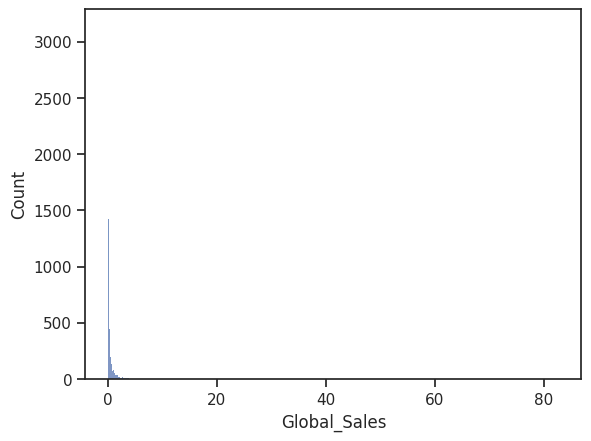

In [ ]:
#distrib de la variable cible 

sns.set_theme(style="ticks")

sns.histplot(target)
plt.show()
#Le montant des ventes n'est pas parlant nous allons regarder ce que donne la distrib du journal des ventes 

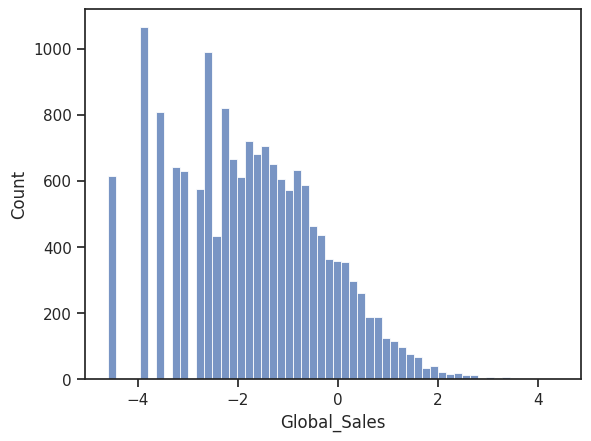

In [ ]:
y = np.log(target)
sns.histplot(y)
plt.show()
#L’histogramme représente la distribution de ventes de jeux vidéos à l’échelle logarithmique.
#Axe horizontal : valeurs de ventes à l’échelle logarithmique
#Axe vertical : fréquence de chaque valeur de ventes.

In [ ]:
#La majorité de jeux vidéos ont des ventes relativement faibles, tandis qu’un petit nombre de jeux vidéos ont des ventes relativement élevées :
# un petit nombre de titres très populaires représente une grande part des ventes totales 

In [ ]:
# Création d'un masque des lignes des valeurs manquantes 
mask = X.isna()["Publisher"] | X.isna()["Global_Sales"]
# et ils les enlèvent 
X.dropna(subset=["Publisher", "Global_Sales"], inplace=True)
y = y[~mask]

In [ ]:
#Nous mélangeons les données pour ne pas les présenter dans un ordre particulier au modèle et ne pas ajouter de biais
#X = dfr.sample(frac=1, random_state=11, ignore_index=True)
#X.head(3)

,jeu,Genre,nom_plateforme,nom_fabricant,editeur,developpeur,annee,ttl_sales,dev_country,metacritic_summary,...,igdb_age_rating_category,igdb_age_rating_class,igdb_developer_name,igdb_developer_country,igdb_publisher_name,igdb_publisher_country,igdb_websites_category,igdb_websites_url,twitch_id,twitch_streams_count
0,Greg Hastings' Tournament Paintball Max'd,Shooter,Playstation 2,Sony,Activision,WXP,2006.0,0.01,Unknown,Build Your Field - Design and play your own cu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Botanicula,Adventure,Microsoft Windows,PC,Amanita Design,AMANITA DESIGN,2012.0,0.33,Unknown,Botanicula is point'n'click exploration game c...,...,"PEGI, ESRB, CLASS_IND, USK","PEGI_7, ESRB_E10, CLASS_IND_12, USK_6",Amanita Design,Czechia,Amanita Design,Czechia,"steam, official, wikia, wikipedia, facebook, t...","https://store.steampowered.com/app/207690, htt...",NaN,NaN
2,Persona 3: Dancing in Moonlight,Music,Playstation 4,Sony,Atlus,ATLUS,2018.0,0.04,Japan,Choose from several difficulty levels and danc...,...,ESRB,ESRB_T,P Studio,Japan,"Atlus, Atlus USA","Japan, United States of America","official, wikia, wikipedia, twitch","https://atlus.com/personadancing/, http://mega...",NaN,NaN


In [ ]:
#création d'un masque booléen qui prend la valeur True pour toutes les lignes qui ont une valeur manquante dans la colonne "editeur"
#mask1 = X.isna()["editeur"]
#création d'un masque booléen qui prend la valeur True pour toutes les lignes qui ont une valeur manquante dans la colonne "ttl_sales"
#mask2 = X.isna()["ttl_sales"]
# Suppression des valeurs manquantes dans ces deux colonnes
#X.dropna(subset=["editeur", "ttl_sales"], inplace=True)
#mise à jour dans Y des lignes supprimées de X
#y = y[~mask1]
#y = y[~mask2]

In [ ]:
!pip install dirty_cat
from dirty_cat.datasets import get_ken_table_aliases

get_ken_table_aliases()

from dirty_cat.datasets import get_ken_types

get_ken_types(embedding_table_id="games")
from dirty_cat.datasets import get_ken_embeddings
embedding_games = get_ken_embeddings(
    types="game",
    exclude="companies|developer",
    embedding_table_id="games",
)
embedding_publisher = get_ken_embeddings(
    types="game_development_companies|game_companies|game_publish",
    embedding_table_id="games",
    suffix="_aux",
)

# We keep the 200 embeddings column names in a list (for the |Pipeline|):
n_dim = 200

emb_columns = [f"X{j}" for j in range(n_dim)]

emb_columns2 = [f"X{j}_aux" for j in range(n_dim)]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/_fetching.py:612: UserWarning: Could not find the dataset 39266678 locally. Downloading it from figshare; this might take a while... If it is interrupted, some files might be invalid/incomplete: if on the following run, the fetching raises errors, you can try fixing this issue by deleting the directory /usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/data/figshare_39266678.parquet.
  info = _fetch_figshare(dataset_id, data_directory)
/usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/_fetching.py:612: UserWarning: Could not find the dataset 39254360 locally. Downloading it from figshare; this might take a while... If it is interrupted, some files might be invalid/incomplete: if on the following run, the fetching raises errors, you can try fixing this issue by deleting the directory /usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/data/figshare_39254360.parquet.
  info = _fetch_figshare(dataset_id, data_d

In [ ]:
#!pip install dirty_cat
#représentation numérique de chaque jeu vidéos (calculée en fonction des caractéristiques du jeu : titre, description...)Nous allons utiliser un algo de traitement du langage naturel
#Ici cette fonction get_ken_embeddings va venir récupérer des donnes d'incorporation (embedding), 3 param sont passés à la fonction
#from dirty_cat.datasets import get_ken_embeddings
#création d'une première table incluant les jeux et excluants les compagnies et développer spécifiés dans la chaine de caractère
#embedding_games = get_ken_embeddings(
    #types="game",
    #exclude="companies|developer",
    #embedding_table_id="games",
#)

#création d'une seconde table on va inclure toutes les données contenant les "developper, plateforme, compagnie"
#embedding_publisher = get_ken_embeddings(
    #types="game_development_companies|game_companies|game_publish",
    #embedding_table_id="games",
    #suffix="_aux",
#)

#on va garder que 200 données d'incorporation pour chaque table 
#n_dim = 200

#emb_columns = [f"X{j}" for j in range(n_dim)]

#emb_columns2 = [f"X{j}_aux" for j in range(n_dim)]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 3.7 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/_fetching.py:590: UserWarning: Could not find the dataset 39266678 locally. Downloading it from figshare; this might take a while... If it is interrupted, some files might be invalid/incomplete: if on the following run, the fetching raises errors, you can try fixing this issue by deleting the directory /usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/data/figshare_39266678.parquet.
  info = _fetch_figshare(dataset_id, data_directory)
/usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/_fetching.py:590: UserWarning: Could not find the dataset 39254360 locally. Downloading it from figshare; this might take a while... If it is interrupted, some files might be invalid/incomplete: if on the following run, the fetching raises errors, you can try fixing this issue by deleting the directory /usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/data/figshare_39254360.parquet.
  info = _fetch_figshare(dataset_id, data_d

In [ ]:
#augementation des fonctionnalités des données 
from dirty_cat import FeatureAugmenter
#table embedding vecteurs représentant les jeux 
fa1 = FeatureAugmenter(tables=[(embedding_games, "Entity")], main_key="Name")
#table embedding vecteurs représentant les éditeurs
fa2 = FeatureAugmenter(tables=[(embedding_publisher, "Entity")], main_key="Publisher")

X_full = fa1.fit_transform(X)
X_full = fa2.fit_transform(X_full)

/usr/local/lib/python3.9/dist-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")
/usr/local/lib/python3.9/dist-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")


In [ ]:
#nous allons essayer  de prédire le montant des ventes en utilisant uniquement 
#les fonctionnalités de base contenues dans la première table 

In [ ]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder
from dirty_cat import MinHashEncoder

min_hash = MinHashEncoder(n_components=100)
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoder = make_column_transformer(
    ("passthrough", ["Year"]),
    (ohe, ["Genre"]),
    (min_hash, ["Platform"]),
    remainder="drop",
)

In [ ]:
#on crée notre pipeline et utilisons un algo de gradient boosting (il va utiliser l'ensemble des modèles de regression pour prédire la valeur de notre variable cible)
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline

hgb = HistGradientBoostingRegressor(random_state=0)
pipeline = make_pipeline(encoder, hgb)

In [ ]:
from sklearn.model_selection import cross_validate

# Nous mettons les résultats dans des dictionnaires:
all_r2_scores = dict()
all_rmse_scores = dict()

cv_results = cross_validate(
    pipeline, X_full, y, scoring=["r2", "neg_root_mean_squared_error"]
)

all_r2_scores["Base features"] = cv_results["test_r2"]
all_rmse_scores["Base features"] = -cv_results["test_neg_root_mean_squared_error"]

print("With base features:")
print(
    f"Mean R2 is {all_r2_scores['Base features'].mean():.2f} +-"
    f" {all_r2_scores['Base features'].std():.2f} and the RMSE is"
    f" {all_rmse_scores['Base features'].mean():.2f} +-"
    f" {all_rmse_scores['Base features'].std():.2f}"
)

With base features:
Mean R2 is -14.65 +- 4.28 and the RMSE is 1.52 +- 0.72


In [ ]:
#On va créer des représentations vectorielles à partir d'info issues de wikipédia 
#Nous gardons que les colonnes des embedding 
encoder2 = make_column_transformer(
    ("passthrough",emb_columns),
   ("passthrough", emb_columns2 ),
    remainder="drop",
)

In [ ]:
#On redéfinit une pipeline :
#pour rappel : hgb = HistGradientBoostingRegressor(random_state=0)
pipeline2 = make_pipeline(encoder2, hgb)

In [ ]:
#résultats avec cross_validation 
cv_results2 = cross_validate(
    pipeline2, X_full, y, scoring=["r2", "neg_root_mean_squared_error"]
)

all_r2_scores["KEN features"] = cv_results2["test_r2"]
all_rmse_scores["KEN features"] = -cv_results2["test_neg_root_mean_squared_error"]

print("With KEN Embeddings:")
print(
    f"Mean R2 is {all_r2_scores['KEN features'].mean():.2f} +-"
    f" {all_r2_scores['KEN features'].std():.2f} and the RMSE is"
    f" {all_rmse_scores['KEN features'].mean():.2f} +-"
    f" {all_rmse_scores['KEN features'].std():.2f}"
)

With KEN Embeddings:
Mean R2 is -14.13 +- 2.73 and the RMSE is 1.47 +- 0.63


In [ ]:
#Pour les deux modèles le r2 montre que la variable cible n'est pas liée aux autres variables (le R2 doit généralement etre compris entre 0 et 1)
#L'erreur de prédiction est de 1,60 unités pour chaque valeur de la variable cible 
#avec un ecart type des mesures de précision du modèle de 1.02

In [ ]:
#Nous pouvons conclure que les résultats rapportés indiquent que le modèle basé sur les représentations vectorielles KEN ne performe pas 
#très bien, avec un R2 négatif indiquant une mauvaise performance globale, 
#et un RMSE relativement élevé indiquant une erreur moyenne importante dans les prédictions du modèle.

In [ ]:
#Prédiction finale avec toutes les variables incluses 
encoder3 = make_column_transformer(
    ("passthrough", emb_columns),
    ("passthrough", emb_columns2),
    ("passthrough", ["Year"]),
    (ohe, ["Genre"]),
    (min_hash, ["Platform"]),
    remainder="drop",
)

In [ ]:
#on redéfinit une pipeline 
#pour rappel : hgb = HistGradientBoostingRegressor(random_state=0)
pipeline3 = make_pipeline(encoder3, hgb)

In [ ]:
#on regarde les résultats 
cv_results3 = cross_validate(
    pipeline3, X_full, y, scoring=["r2", "neg_root_mean_squared_error"]
)

all_r2_scores["Base + KEN features"] = cv_results3["test_r2"]
all_rmse_scores["Base + KEN features"] = -cv_results3["test_neg_root_mean_squared_error"]

print("With KEN Embeddings and base features:")
print(
    f"Mean R2 is {all_r2_scores['Base + KEN features'].mean():.2f} +-"
    f" {all_r2_scores['Base + KEN features'].std():.2f} and the RMSE is"
    f" {all_rmse_scores['Base + KEN features'].mean():.2f} +-"
    f" {all_rmse_scores['Base + KEN features'].std():.2f}"
)

With KEN Embeddings and base features:
Mean R2 is -12.40 +- 2.16 and the RMSE is 1.38 +- 0.58


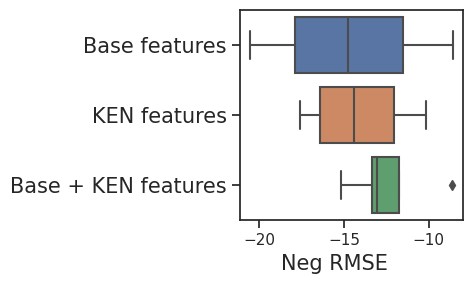

In [ ]:
#sans trop de surprise toujours aussi mauvaix : variable cibe non liées aux autres . Le modèle ne performe pas bien.
#représentation graphique des scores 
plt.figure(figsize=(5, 3))
# sphinx_gallery_thumbnail_number = -1
ax = sns.boxplot(data=pd.DataFrame(all_r2_scores), orient="h")
plt.xlabel("Neg RMSE     ", size=15)
plt.yticks(size=15)
plt.tight_layout()